In [10]:
import os, sys, json
from matplotlib import pyplot as plt

import numpy as np
import itertools

In [11]:
model_dirpath = "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS"
models = os.listdir(model_dirpath)

dictionary = {
"accuracy"  : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/accuracy_models.json",
"fscore"    : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/fscore_models.json",
"iou_score" : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/iou_score_models.json",
"MCCLoss"   : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/MCCLoss_models.json",
"precision" : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/precision_models.json",
"recall"    : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/recall_models.json",
"time"      : "/home/vihanimm/SegmentationModelToolkit/workdir/SMP_Pipeline/output_SMP_ANALYSIS/time_models.json"
}

In [12]:
import operator
time_dictionary = {}

analysis_notdone = []
for model in models:
    model_path = os.path.join(model_dirpath, model)
    # print(model_path)
    json_path =  os.path.join(model_path, "metrics_accuracy.json")
    if not os.path.exists(json_path):
        analysis_notdone.append(model)
        continue
    json_metric = json.load(open(json_path, "r"))
    time_dictionary[model] = json_metric["time_allmetrics"]
time_dictionary = {k: str(v)+"-0" for k, v in sorted(time_dictionary.items(), 
                                            key=lambda item: item[1])}
time_jsonpath = os.path.join(model_dirpath, "time_models.json")
with open(time_jsonpath, 'w') as metric_json:
    json.dump(time_dictionary, metric_json, indent=4)


In [13]:
show_howmany = 50

for key in dictionary.keys():
    accuracy = json.load(open(dictionary[key], "r"))
    accuracy_names = list(accuracy.keys())
    accuracy_values = list(accuracy.values())
    split_avg = []
    split_std = []
    for val in accuracy_values:
        val_tuple = tuple(val.split("-"))
        split_avg.append(float(val_tuple[0]))
        split_std.append(float(val_tuple[1]))
    # print(split_avg)

    rand_names = []
    rand_avgs  = []
    randgraph_idx = sorted(np.random.randint(51, len(accuracy_names)-51, 50).astype('int'))
    for idx in randgraph_idx:
        # print(accuracy_names[idx], accuracy_values[idx])
        rand_names.append(accuracy_names[idx])
        rand_avgs.append(split_avg[idx])
    
    fig, ax = plt.subplots(figsize=(20,30))
    fig.tight_layout()
    if key != "MCCLoss":
        bars1 = ax.barh(accuracy_names[0:show_howmany], split_avg[0:show_howmany],label="Worst Performing Models")
        # ax.barh(["..."], [0])
        bars3 = ax.barh(rand_names, rand_avgs, label="(Random) Middle Performing Models")
        bars2 = ax.barh(accuracy_names[-show_howmany:], split_avg[-show_howmany:],label="Best Performing Models")
    else:
        bars1 = ax.barh(accuracy_names[0:show_howmany], split_avg[0:show_howmany],label="Best Performing Models")
        # ax.barh(["..."], [0])
        bars3 = ax.barh(rand_names, rand_avgs, label="(Random) Middle Performing Models")
        bars2 = ax.barh(accuracy_names[-show_howmany:], split_avg[-show_howmany:],label="Worst Performing Models")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[::-1], labels=labels[::-1], loc='upper right', bbox_to_anchor=(.99, .99))
    fig.subplots_adjust(left=.35)

    if key != "time":
        plt.xlim([min(split_avg) - 0.05, min(max(split_avg) + .1, 1.0)])
    else:
        plt.xlim([min(split_avg) - 5, max(split_avg) + 10])
    plt.title(f"{key}")
    output_path = os.path.join("graphs", f"{key}_modelgraphs.png")
    plt.savefig(output_path)

In [14]:
dict_keys = list(dictionary.keys())
scatterplot_parameters = itertools.combinations(dict_keys,2)

('accuracy', 'fscore')
SAVED graphstest/SCATTER_accuracy_fscore
('accuracy', 'iou_score')
SAVED graphstest/SCATTER_accuracy_iou_score
('accuracy', 'MCCLoss')
SAVED graphstest/SCATTER_accuracy_MCCLoss
('accuracy', 'precision')
SAVED graphstest/SCATTER_accuracy_precision
('accuracy', 'recall')
SAVED graphstest/SCATTER_accuracy_recall
('accuracy', 'time')
SAVED graphstest/SCATTER_accuracy_time
('fscore', 'iou_score')
SAVED graphstest/SCATTER_fscore_iou_score
('fscore', 'MCCLoss')
SAVED graphstest/SCATTER_fscore_MCCLoss
('fscore', 'precision')
SAVED graphstest/SCATTER_fscore_precision
('fscore', 'recall')
SAVED graphstest/SCATTER_fscore_recall
('fscore', 'time')
SAVED graphstest/SCATTER_fscore_time
('iou_score', 'MCCLoss')
SAVED graphstest/SCATTER_iou_score_MCCLoss
('iou_score', 'precision')
SAVED graphstest/SCATTER_iou_score_precision
('iou_score', 'recall')
SAVED graphstest/SCATTER_iou_score_recall
('iou_score', 'time')
SAVED graphstest/SCATTER_iou_score_time
('MCCLoss', 'precision')
SAV

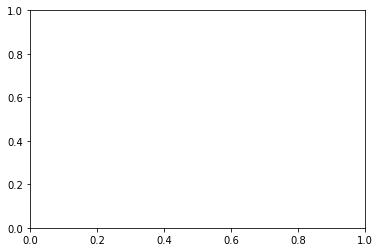

In [15]:
for scatterplot_parameter in scatterplot_parameters:
    # if 'accuracy' not in scatterplot_parameter:
    #     continue
    # if 'MCCLoss' not in scatterplot_parameter:
    #     continue
    print(scatterplot_parameter)
    x_dictionaryvalue = dictionary[scatterplot_parameter[0]]
    y_dictionaryvalue = dictionary[scatterplot_parameter[1]]
    x = json.load(open(x_dictionaryvalue, 'r'))
    y = json.load(open(y_dictionaryvalue, 'r'))
    
    names = list(x.keys())
    # x_avgs = [float(val.split("-")[0])  for val in list(x.values())]
    
    # y_names = list(y.keys())
    # y_avgs  = [float(val.split("-")[0])  for val in list(y.values())]
    x_avgs = []
    y_avgs = []
    for name in names:
        x_avgs.append(float(x[name].split("-")[0]))
        y_avgs.append(float(y[name].split("-")[0]))
        # print(name, x_avgs[-1], y_avgs[-1])
        
    # for x,y in zip(x_names, y_names):
    #     if x != y:
    #         print(x, y, "stop the madness")
    #         break
    
    plt.cla()
    plt.clf()
    plt.scatter(x_avgs, y_avgs)
    plt.xlabel(scatterplot_parameter[0])
    plt.ylabel(scatterplot_parameter[1])
    output_path = os.path.join("graphs", f"SCATTER_{scatterplot_parameter[0]}_{scatterplot_parameter[1]}")
    
    plt.savefig(output_path)
    print(f"SAVED {output_path}")
    plt.clf()
    plt.cla()